# Import dependencies and prepare default directory

In [1]:
import os
try:
  import supramolsim
except:
  !pip install git+https://github.com/HenriquesLab/SupraMolecularSimulator.git

from supramolsim.utils import data_format
from supramolsim.generate import coordinates_field as field
import supramolsim.workflows as workflows

pck_dir = os.path.dirname(os.path.abspath(supramolsim.__file__))
local_dir = os.path.join(pck_dir, "configuration")
configuration_path = []
configuration_path.append(local_dir)

# Load scructure

In [ ]:
# HIV example
structure_id = "3J3Y"
structure, structure_param = supramolsim.load_structure(
    structure_id, configuration_path[0]
)

Loading structure.


3J3Y.cif: 200MiB [02:49, 1.23MiB/s]                            


Parsing structure. This might take a few seconds...
Building structure for: 3J3Y: Atomic-level structure of the entire HIV-1 capsid...
Structure Loaded!
Structure has no predefined labels


Showing 1.0% of the total atoms


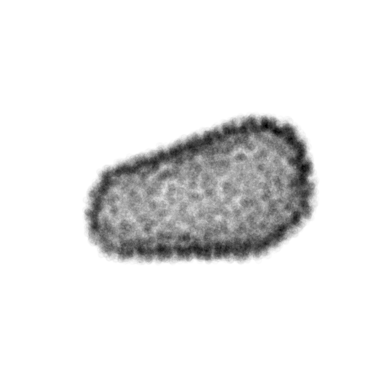

In [4]:
structure.show_assembly_atoms(view_init=[90,0,0])

# Add lables

Searching for sequence: SPRTLNA
Label is indirect label
Assigning normals to targets with method: scaling
No emitters defined in label. Using direct labelling


/Users/damianmartinez/Documents/AIOCB/Code/SupraMolecularSimulator/src/supramolsim/generate/labelled_instance.py:547: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


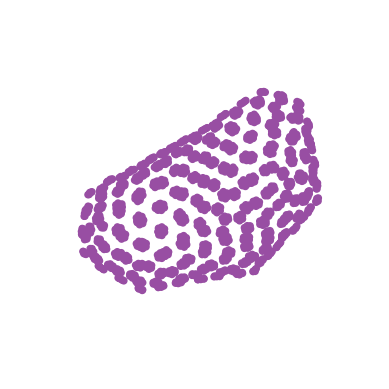

In [5]:
label_id = "3J3Y_capsid_label_p24_direct"
fluorophore_id = "AF647"
lab_eff = 1.0
tmp_label1 = data_format.structural_format.label_builder_format(
    label_id, fluorophore_id, lab_eff
    )
particle = supramolsim.particle_from_structure(
    structure, [tmp_label1], configuration_path[0]
)
particle.show_instance()

# (Optional) Add defects to the particle

No emitters defined in label. Using direct labelling


/Users/damianmartinez/Documents/AIOCB/Code/SupraMolecularSimulator/src/supramolsim/generate/labelled_instance.py:547: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


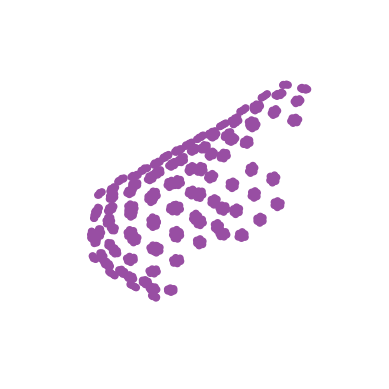

In [12]:
## add defects
short_dist_cluster = 20
long_dist_cluster = 100
deg_dissasembly = 0.5

particle.add_defects(
    eps1=short_dist_cluster,
    xmer_neigh_distance=long_dist_cluster,
    deg_dissasembly=deg_dissasembly,
)

particle.show_instance()

# Create particle field

In [27]:
nparticles = 30
min_distance = 70
random = True
molecule_parameters = dict(minimal_distance=min_distance)
coordinates_field = field.create_min_field(nparticles=nparticles,
                                            random_placing=random,
                                            molecule_pars=molecule_parameters)
coordinates_field.create_molecules_from_InstanceObject(particle)
coordinates_field.construct_static_field()
exported_field = coordinates_field.export_field()

Initialising default field
AF647 p24_antibody
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling
No emitters defined in label. Using direct labelling


Showing all fluorophores
AF647


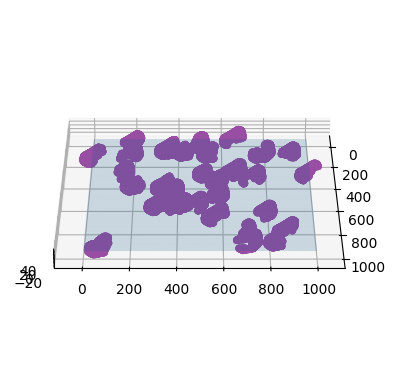

In [28]:
coordinates_field.show_field()

# Create imager

In [29]:
selected_mods = ["STED_demo", "Confocal_demo"]
imaging_system = workflows.create_imaging_system(
    exported_field, selected_mods, configuration_path[0]
)

scaling factor set to 0.001
Creating channel for each fluorophore
AF647
emission for STED_demo set to constant
Generating unitary analytical PSF stack with shape [120, 120, 40] and standard deviations [3.9, 3.9, 5]
Creating channel for each fluorophore
AF647
emission for Confocal_demo set to constant
Generating unitary analytical PSF stack with shape [150, 150, 150] and standard deviations [9.4, 9.4, 33.1]


In [30]:
from supramolsim.utils.data_format import configuration_format

acq_params_per_mod = dict()
acq_params_per_mod["STED_demo"] = configuration_format.format_modality_acquisition_params(
    exp_time=0.002,
    nframes=20,
    save=False 
)
acq_params_per_mod["Confocal_demo"] = configuration_format.format_modality_acquisition_params(
    exp_time=0.002,
    nframes=10,
    save=False
)


In [31]:
exp_name = "SupraMolSim_output_script"
# sav_dir = "YOUR_PATH"

output = workflows.generate_multi_imaging_modalities(
        image_generator=imaging_system,
        experiment_name=exp_name,
        acquisition_param=acq_params_per_mod,
)

STED_demo {'exp_time': 0.002, 'noise': True, 'save': False, 'nframes': 20, 'channels': ['ch0']}
imaging channel: ch0
Simulating imaging from modality: STED_demo in channel ch0
Average number of photons per frame: 200.0
size of psf is: (120, 120, 40)


100%|██████████| 20/20 [00:07<00:00,  2.68it/s]


Binning image stack


100%|██████████| 20/20 [00:00<00:00, 4984.91it/s]


Adding noise
Confocal_demo {'exp_time': 0.002, 'noise': True, 'save': False, 'nframes': 10, 'channels': ['ch0']}
imaging channel: ch0
Simulating imaging from modality: Confocal_demo in channel ch0
Average number of photons per frame: 200.0
size of psf is: (150, 150, 150)


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


Binning image stack


100%|██████████| 10/10 [00:00<00:00, 8264.64it/s]

Adding noise


# Preview your images

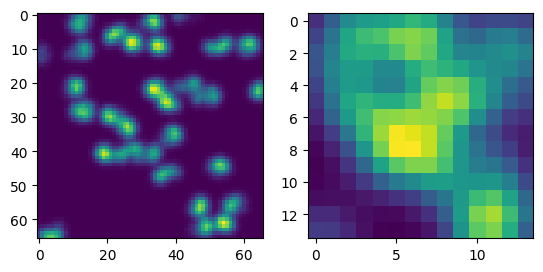

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
nframe = 0
axs[0].imshow(output['STED_demo'][nframe])
axs[1].imshow(output['Confocal_demo'][nframe])
